In [1]:
import pandas as pd

In [2]:
wq_red = pd.read_csv('data/winequality-red.csv')
raisin = pd.read_excel('data/Raisin_Dataset.xlsx')
diabetes = pd.read_csv('data/diabetes.csv')
wq_red = wq_red.sample(n=600, random_state=1)
raisin = raisin.sample(n=600, random_state=1)
diabetes = diabetes.sample(n=600, random_state=1)

- I reduced the dataset to 600 values to speed up the calculations.

In [3]:
X_red_wine = wq_red.drop('quality', axis=1).to_numpy()
y_red_wine = wq_red['quality'].to_numpy()
X_raisin = raisin.drop('Class', axis=1).to_numpy()
y_raisin = raisin['Class'].to_numpy()
X_diabetes = diabetes.drop('Outcome', axis=1).to_numpy()
y_diabetes = diabetes['Outcome'].to_numpy()

In [4]:
X_values = [X_red_wine, X_raisin, X_diabetes]
titles = ["Red Wine quality", "Raisin Varieties", "Diabetes Outcome"]

In [5]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import Functions as f

In [6]:
iterations = 100
error = 0.0001
alpha = 0.001

3.1. Generate a scatterplot matrix comparing the results of your implementation of Sammon Mapping with PCA and
t-SNE for each data set. The resulting visualization should be a 3 × 3 matrix where each cell is a scatterplot of a
DR technique applied to a data set.

In [7]:
dr_results = f.generate_dr_results(X_values, iterations, error, alpha)

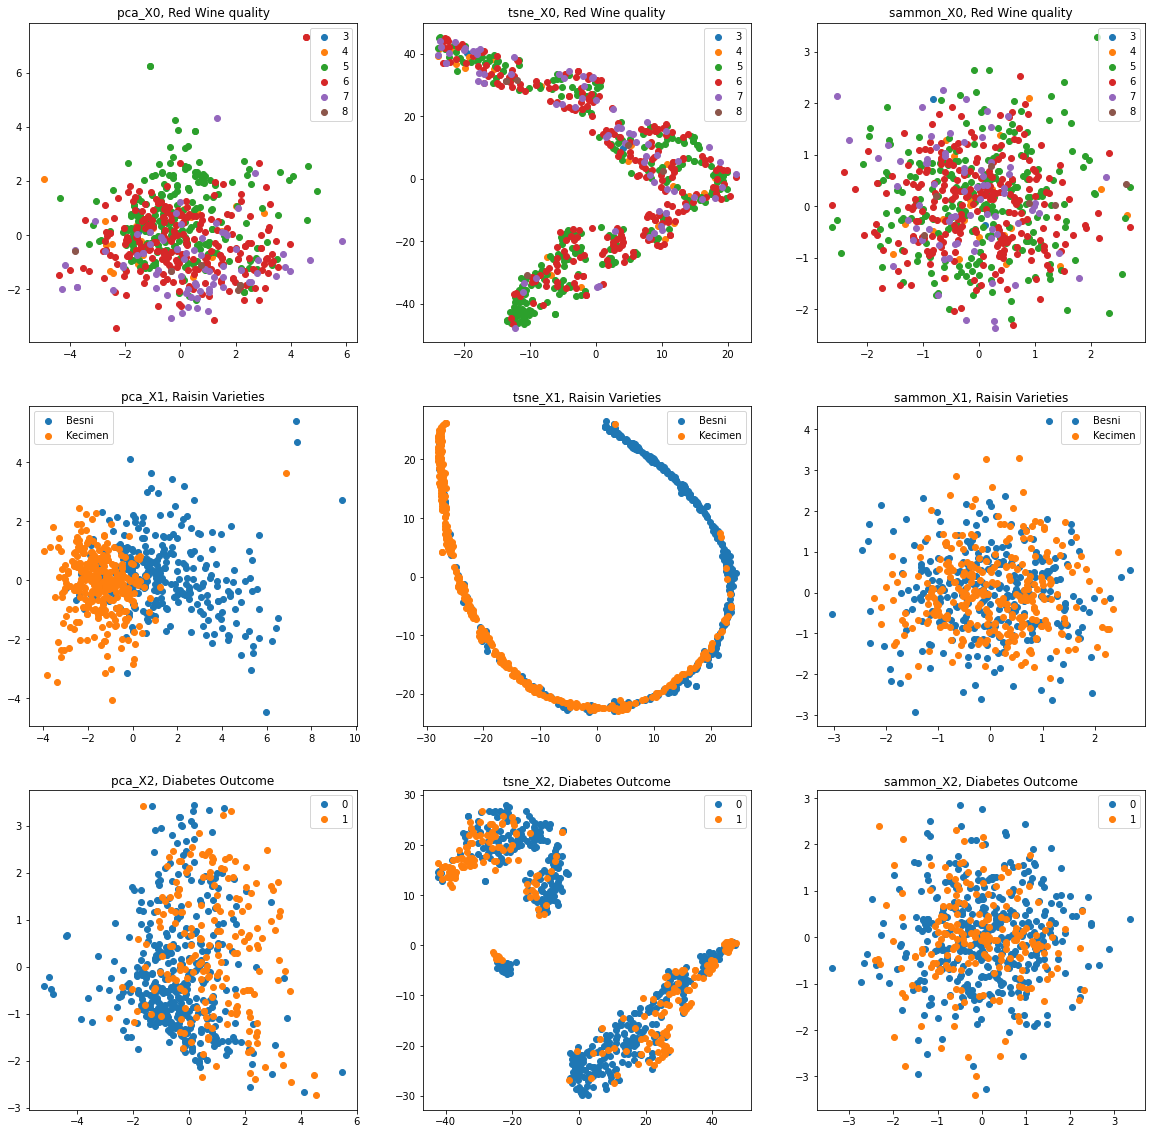

In [24]:
cmap = cm.get_cmap('Set2')
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
for i in range(9):
    result = list(dr_results.values())[i]
    y = np.empty(result.shape[0])
    if i < 3 :
        y = y_red_wine
    elif i < 6:
        y = y_raisin
    else:
        y = y_diabetes
    unique_labels = np.unique(y)
    for label in unique_labels:
        x = result[y == label, 0]
        y_data = result[y == label, 1]
        scatter = axes[i // 3, i % 3].scatter(x, y_data, label=str(label), cmap=cmap)

    axes[i // 3, i % 3].set_title(list(dr_results.keys())[i] + ", " + titles[i // 3])
    axes[i // 3, i % 3].legend()

- After running the DR algorithms several times I noticed that:
1. PCA performs better with scaled data. I used standard scaler for this purpose.
2. t-SNE does not require scaling. With scaled data classes are not separated well.
3. Sammon Mapping also does not require scaling. I had a lot of problems with this algorithm as I had to tune the parameters a lot to get a result without having points in the corners of the plot. I realised that the learning rate had to be set to a low value (0.001) and the number of iterations had to be set to a high value (100).
- In my opinion, the best results are obtained with PCA since it is possible to visualize the boundary. The classes are separated in all plots and there is a clear decision boundary between them. In the first plot, even though there are many classes it is clear that classes classified as higher numbers (6,7,8) are concentrated in the bottom part of the graph, while the upper part contains classes (3,4,5). t-SNE also performs well for Raisin and Diabetes dataset, but for the Red Wine quality classes are not separated well as most of them are mixed together. Sammon Mapping performs the worst. The classes are not separated well and there is no clear decision boundary between them. I am not sure if this is due to the parameters I used or if this is the best result that can be obtained with this algorithm. It is hard to tell as I could not find any good example of how Sammon Mapping should perform.
- In Red Wine quality datasets, there are 6 different classes, and there are a lot of similar values in features of this dataset. Because of this similarity between feature rows, it is hard to separate classes and this could be the reason why all 3 algorithms perform relatively bad on this dataset. In the other two datasets, there are only 2 possible classes so they are easier to separate and there is a clear decision boundary between them. I belive that with more samples and bigger plots the results would be better and more clear in all 3 algorithms.

3.2 Choose one of the DR techniques from the previous exercise and generate a similar scatterplot matrix to compare the results of Bisecting k-Means with classic k-Means and hierarchical clustering for each data set. The resulting visualization should be a 3 × 3 matrix where each cell is a scatterplot of the chosen DR technique applied to a data set, with the colors of the points showing the clusters using a qualitative colormap.

- I choose t-SNE for this exercise because I find it the most interesting and most suitable for clustering. I will use the same parameters as in the previous exercise.

In [6]:
from sklearn.manifold import TSNE

indices = [1, 4, 7]
#selected_dr = [list(dr_results.values()) [i] for i in indices]
tsne = TSNE(n_components=2)
selected_dr = []
for x in X_values:
    selected_dr.append(tsne.fit_transform(x))

In [7]:
clustering_results = f.generate_clustering_results(selected_dr)

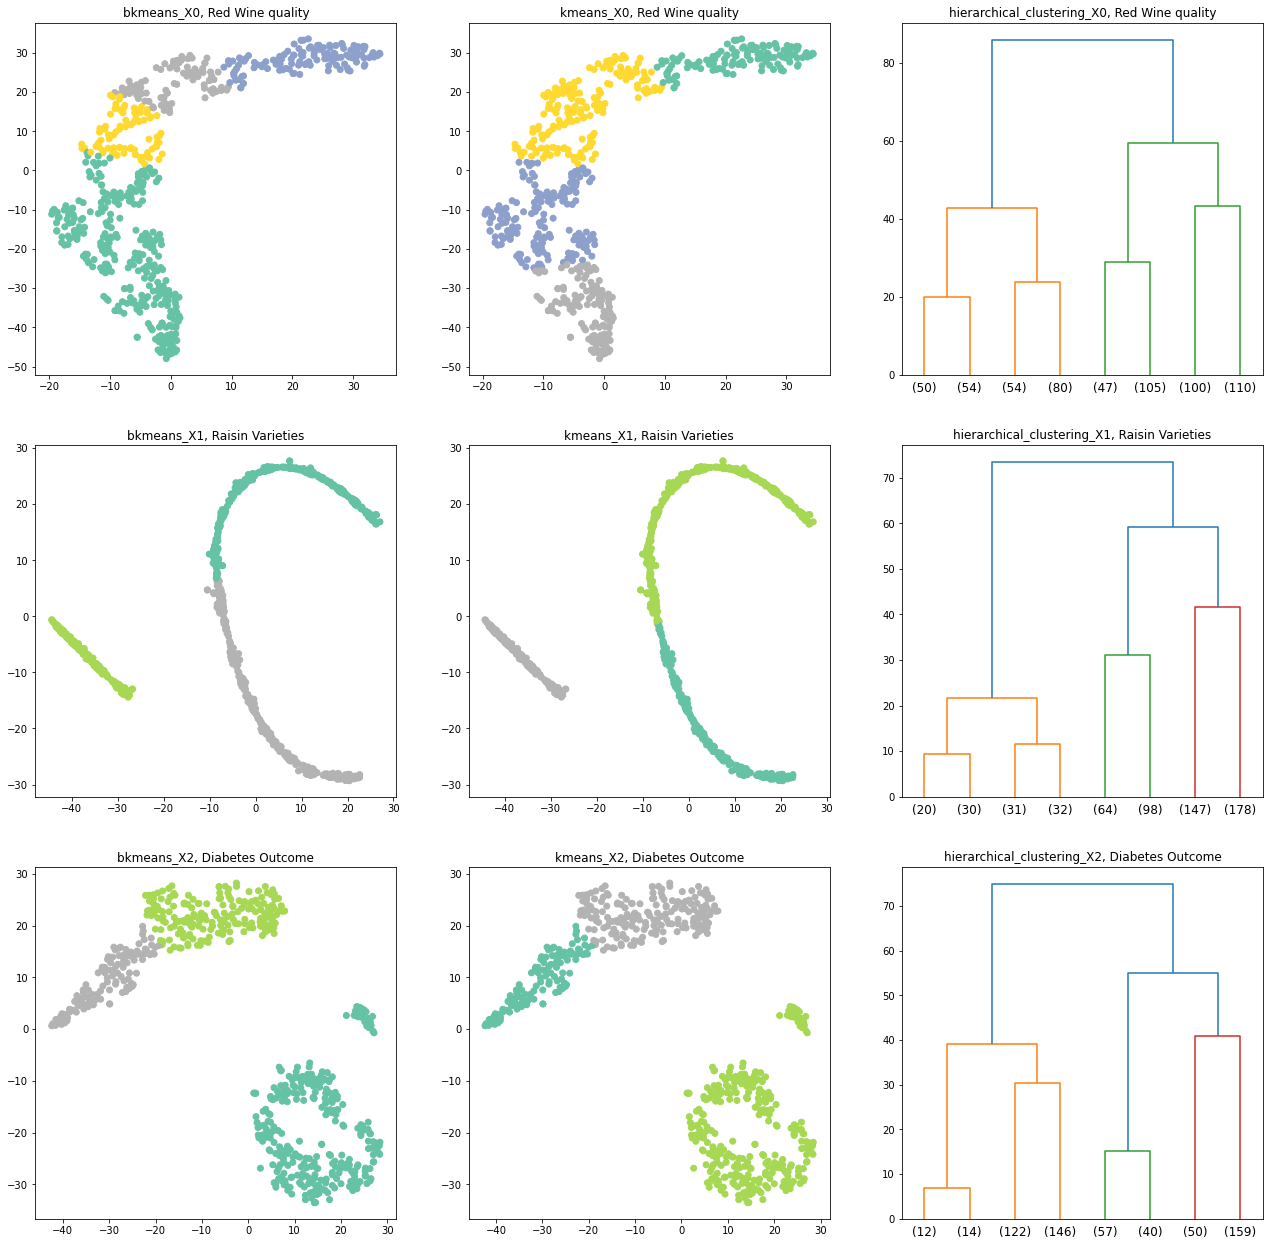

In [8]:
from scipy.cluster.hierarchy import dendrogram
fig, axes = plt.subplots(3, 3, figsize=(22, 22))
for i, key in enumerate(clustering_results.keys()):
    clustering_result = clustering_results[key]
    if i < 3:
        dr = selected_dr[0]
    elif i < 6:
        dr = selected_dr[1]
    else:
        dr = selected_dr[2]
    if key.startswith('hierarchical'):
        dendrogram(clustering_result, ax=axes[i // 3, i % 3], truncate_mode='level', p=2, orientation='top')
        axes[i // 3, i % 3].set_title(key + ", " + titles[i // 3])
    else:
        axes[i // 3, i % 3].scatter(dr[:, 0], dr[:, 1], c=clustering_result, cmap='Set2')
        axes[i // 3, i % 3].set_title(key + ", " + titles[i // 3])

- In my opinion, bkmeans and kmeans give a better cluster visualisation as the clusters are in form of data points. However, problem with this is that they require input parameter where I have to define number of clusters that I want to see based on the dataset, and this might require several runs to get good results. Hierarchical clustering have better flexibility in determinating the number of clusters as it found statistically the best number of clusters based on the similarity of the data. This advantage allows hierarchical clustering to give better results in cases where the data is hard to separate. While the precise determination of the clusters still stands on the person using the algorithm (deciding where the cutoff will be), it still gives a good insight of the dataset and how the clusters should be separated, but the visualisation of clusters is not as good as in the case of kmeans and bkmeans. So in my opinion, hierarchical clustering give the precise results in the cases where the data is hard to separate as it dynamically identifies the best number of clusters based on the data similarity. However, for visualisation purposes I would choose kmeans or bkmeans as they give a better visualisation of the clusters. The decision for which algorithm to use at the end depends on the purpose of the analysis, as all 3 algorithms have their advantages and disadvantages. In cases where data is hard to split, maybe a combination of hierarchical clustering and kmeans would be the best solution, firstly to get the best number of clusters with hierarchical clustering and then to visualise them with another algorithm. Alternatively, SSE for kmeans could be used to determine the best number of clusters.
- In all 3 datasets, some clusters are separated clearly. Not all clusters but at least 1 or two, so clustering algorithms managed to find these easily. As previously mentioned, I believe that with bigger plots and more samples the results would be better and more clear in all 3 algorithms.